# MWS Secondary Target Selection

## MWS_WD_SV

Maintainers:
  - Boris Gaensicke (selection/catalog)
  - Andrew Cooper (secondary target code)

In [5]:
ls ../raw

desi_wd_sv.fits.gz


{ DESCRIPTION NEEDED }

The selection criteria are:

???

In [6]:
pwd

'/global/projecta/projectdirs/desi/external/mws/sv/MWS_WD_SV/1/code'

In [7]:
import os
import numpy as np
from astropy.table import Table, Column
import astropy.io.fits as fits

In [8]:
target_class   = 'MWS_WD_SV'
input_filename = 'desi_wd_sv.fits.gz'

REF_CAT   = 'G'
REF_EPOCH = '2015.5'

In [9]:
# Relative paths
input_path  = os.path.join('..','raw',input_filename)

# Separate bright and faint output
output_path = os.path.join('..','indata','{}.fits'.format(target_class))

output_dir  = os.path.dirname(output_path)
if not os.path.exists(output_dir):
    print('Making output directory: {}'.format(os.path.abspath(output_dir)))
    os.makedirs(dir)

In [10]:
print('Reading input: {}'.format(os.path.abspath(input_path)))
d = Table.read(input_path)
print('Read {:d} rows'.format(len(d)))

Reading input: /global/projecta/projectdirs/desi/external/mws/sv/MWS_WD_SV/1/raw/desi_wd_sv.fits.gz
Read 495405 rows


In [11]:
print('First 3 rows:')
print(d[0:3])
print(d.colnames)

First 3 rows:
        WDJ_name             source_id      ... phot_g_mean_mag   Pwd   
----------------------- ------------------- ... --------------- --------
WDJ002536.31+124327.06  2755781549760178048 ...        20.23415 0.973013
WDJ005212.26+135302.04  2777645067895669376 ...       17.841702 0.999746
WDJ011047.84+251514.39   294375065603505536 ...       20.033014 0.946063
['WDJ_name', 'source_id', 'ra', 'dec', 'pmra', 'pmdec', 'phot_g_mean_mag', 'Pwd']


In [12]:
BRIGHT_TIME_BRIGHT_LIMIT = 16.0

finite_mag                 = np.isfinite(d['phot_g_mean_mag'])
brighter_than_bright_limit = (d['phot_g_mean_mag'] < BRIGHT_TIME_BRIGHT_LIMIT) & finite_mag
fainter_than_bright_limit  = (d['phot_g_mean_mag'] > BRIGHT_TIME_BRIGHT_LIMIT) & finite_mag

print('Undefined mags for {:d} targets'.format((~finite_mag).sum()))
print('Mag range: {:5.2f} < G < {:5.2f}'.format(d['phot_g_mean_mag'][finite_mag].min() ,d['phot_g_mean_mag'][finite_mag].max()))
print('Targets brighter than G = 16: {}/{} ({:3.2%})'.format(brighter_than_bright_limit.sum(),
                                                             len(d),
                                                             brighter_than_bright_limit.sum()/len(d)))

bright_time_targets = fainter_than_bright_limit

Undefined mags for 0 targets
Mag range:  8.47 < G < 21.00
Targets brighter than G = 16: 2693/495405 (0.54%)


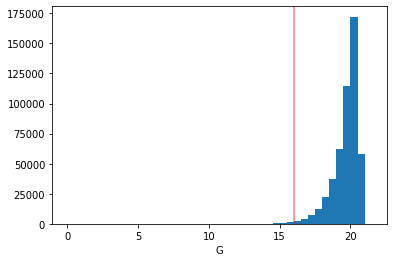

In [18]:
import matplotlib.pyplot as pl
pl.hist(d['phot_g_mean_mag'][finite_mag],bins=np.arange(0,22,0.5));
pl.xlabel('G');
pl.axvline(BRIGHT_TIME_BRIGHT_LIMIT,c='r',alpha=0.5);

Adjust to secondary target data model:

In [19]:
output = d['ra','dec','source_id'][bright_time_targets]
output.rename_columns(['ra','dec','source_id'],['RA','DEC','REF_ID'])
output.add_column(Column(np.repeat(False,len(output)),'OVERRIDE'))
output.add_column(Column(np.zeros(len(output),dtype=np.float32),'PMRA'))
output.add_column(Column(np.zeros(len(output),dtype=np.float32),'PMDEC'))
output.add_column(Column(np.repeat(REF_CAT,len(output)),'REF_CAT'))
output.add_column(Column(np.repeat(REF_EPOCH,len(output)),'REF_EPOCH'))

Add header:

In [20]:
output.meta['VRAWDATA'] = int(os.path.abspath(input_path).split(os.path.sep)[-3])

In [21]:
output[0:3]

RA,DEC,REF_ID,OVERRIDE,PMRA,PMDEC,REF_CAT,REF_EPOCH
float64,float64,int64,bool,float32,float32,str1,str6
6.401203328729036,12.724111661432001,2755781549760178048,False,0.0,0.0,G,2015.5
13.05107993783488,13.883725161059816,2777645067895669376,False,0.0,0.0,G,2015.5
17.699288072591333,25.253909706199853,294375065603505536,False,0.0,0.0,G,2015.5


Write output:

In [22]:
print('Writing {:d} rows of output to {}'.format(len(output),os.path.abspath(output_path)))
output.write(output_path,overwrite=True)

Writing 492712 rows of output to /global/projecta/projectdirs/desi/external/mws/sv/MWS_WD_SV/1/indata/MWS_WD_SV.fits
